# CSCI E-25      
## Homography and Projection 
### Steve Elston

## Introduction   

Transformation or projection of images is a fundamental and essential method in computer vision. Many CV applications, such as image stitching and stereo vision, require projection methods. 

In these exercises our primary focus is on projection using the extrinsic matrix. You will apply three types of commonly used extrinsic and one intrinsic transformation to an image:    
1. **Euclidean**, rotation and translation. 
2. **Similarity**, rotation, translation and scale.
3. **Affine**,  rotation, translation, scale and shear. 
4. **Intrinsic camera parameters**, focal length. 

Before starting the exercises execute the code in the cell below to import the required packages. 

In [1]:
import skimage 
from skimage import data
from skimage.filters.rank import equalize
import skimage.filters as skfilters
import skimage.morphology as morphology
import skimage.transform as transform
from skimage.color import rgb2gray
from skimage import exposure
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Load and Prepare the Image 

For these exercises you will work with a gray scale image. Execute the code in the cell below to load the image and display it. 

Image size = (512, 512)


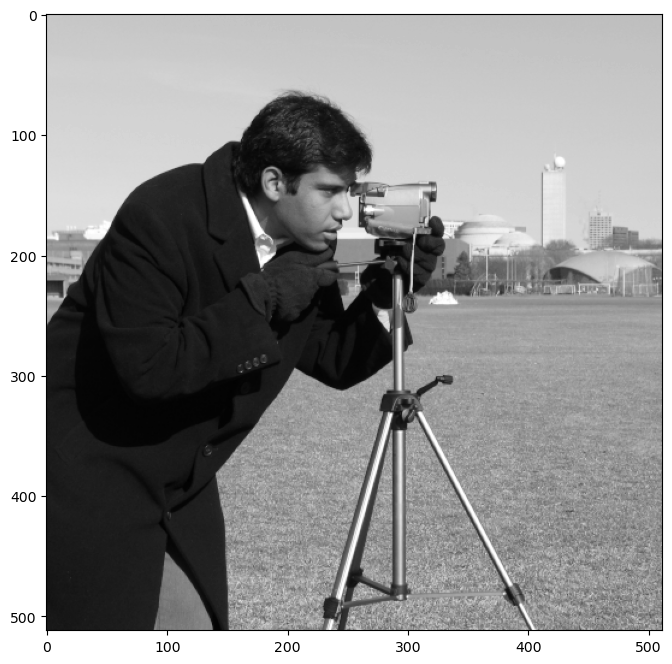

In [2]:
def plot_grayscale(img, h=8):
    plt.figure(figsize=(h, h))
    _=plt.imshow(img, cmap=plt.get_cmap('gray'))

camera_image = data.camera() 
print('Image size = ' + str(camera_image.shape))
plot_grayscale(camera_image)

To make the process of visualizing the transformations of image easier a dark margin will be added to the image. Execute the code in the cell below to place the image on the background and to display the result.   

Shape of the background = (1024, 1024)


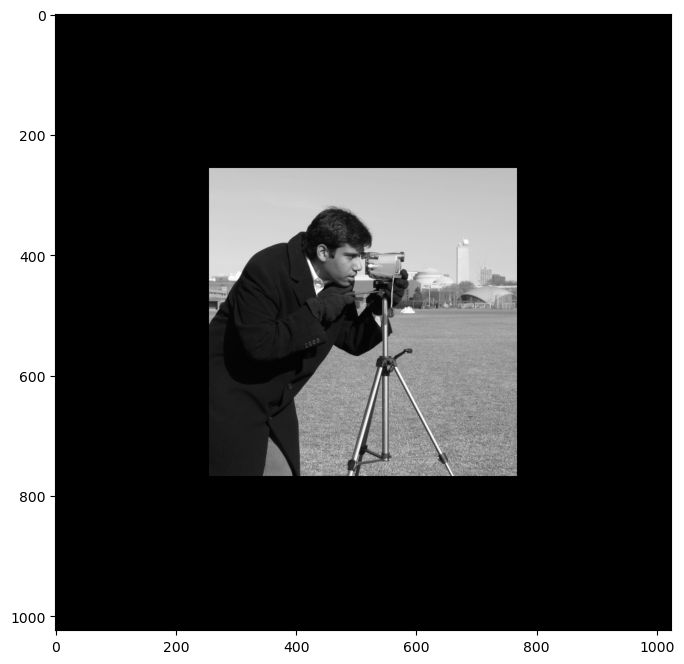

In [3]:
half_margin = 256
background = np.zeros((camera_image.shape[0] + 2*half_margin, camera_image.shape[1] + 2*half_margin)).astype('int')
print('Shape of the background = ' + str(background.shape))

camera_image_background = background
#camera_image_background[2*half_margin:camera_image_background.shape[0], 0:camera_image_background.shape[1]-2*half_margin] = camera_image
camera_image_background[half_margin:camera_image_background.shape[0] - half_margin, half_margin:camera_image_background.shape[1]-half_margin] = camera_image
plot_grayscale(camera_image_background)

> **Note:** Unless otherwise specified, use this gray scale image for the following exercises. 

## Euclidean Transformation

The Euclidean transformation involves only rotation and translation. The shape of objects is preserved by the Euclidean transformation.     

> **Exercise 9-1:** You will now apply the Euclidean transformation to the image with the margin background. Perform the following steps:   
> 1. Create a Numpy transformation matrix for a rotation of $\pi/8$, with no translation, using homogeneous coordinates.   
> 2. Display the transformation matrix.  
> 3. Apply your transformation matrix to the image using the [skimage.transform.warp](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.warp) function, and display the result. You can see the conventions used by Scikit-Image in the documentation for the [skimage.transform.EuclideanTransform](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.EuclideanTransform) function.  

[[ 0.92387953 -0.38268343  0.        ]
 [ 0.38268343  0.92387953  0.        ]
 [ 0.          0.          1.        ]]


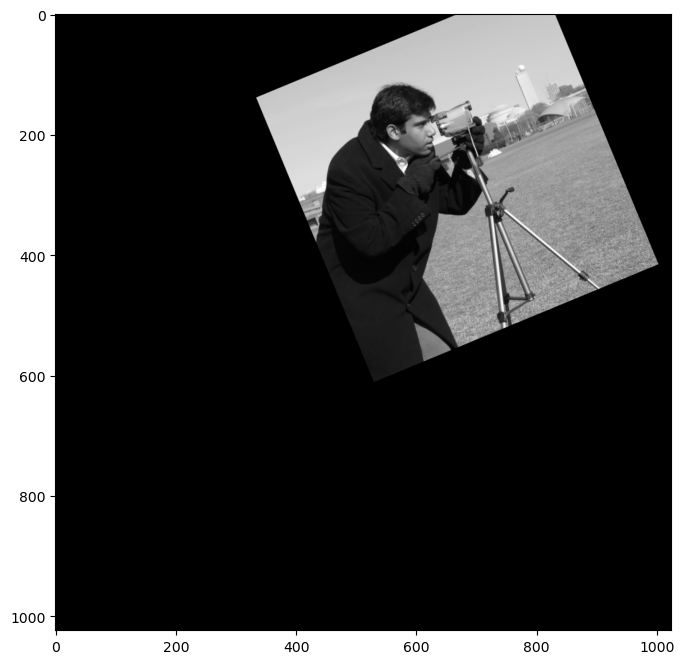

In [45]:
## Put your code below

rotation=(1/8)*math.pi
translation=(0,0)

def transform_mat_2d(rotation, translation):
    transform_mat = \
        np.array(([math.cos(rotation), -math.sin(rotation), translation[0]],
                  [math.sin(rotation), math.cos(rotation), translation[1]],
                  [0,0,1]))

    return transform_mat

transform_mat = transform_mat_2d(rotation, translation)

print(transform_mat)

plot_grayscale(skimage.transform.warp(camera_image_background, transform_mat))

> 4. Next create a new Numpy transformation matrix in homogeneous coordinates with the same rotation of $\pi/8$, but with a translation vector of of $[256, -128]^T$. 
> 5. Display the new transformation matrix.   
> 6. Apply your transformation matrix to the image and display the result.  

[[   0.92387953   -0.38268343  256.        ]
 [   0.38268343    0.92387953 -128.        ]
 [   0.            0.            1.        ]]


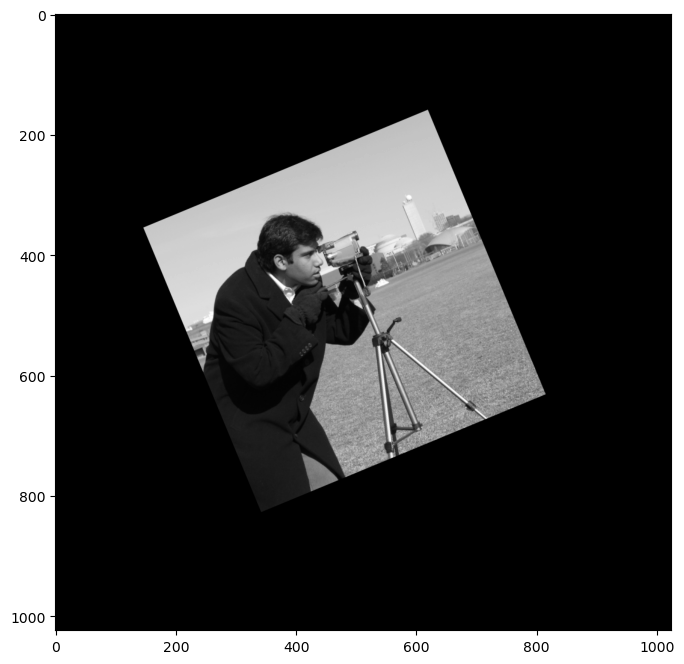

In [46]:
## Put your code below
rotation=(1/8)*math.pi
translation=(256,-128)


transform_mat = transform_mat_2d(rotation, translation)

print(transform_mat)

plot_grayscale(skimage.transform.warp(camera_image_background, transform_mat))

> 7. Finally, you can check your transformation matrix by using the [skimage.transform.EuclideanTransform](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.EuclideanTransform) function, using the rotation angle and translation vector. Compute and display the transformation matrix, in homogeneous coordinates, using the arguments specified in step 4 of this exercise.   

In [58]:
## Put your code below
true_mat = skimage.transform.EuclideanTransform(rotation=math.pi/8, translation=[256.-128])
print(true_mat)

<EuclideanTransform(matrix=
    [[  0.92387953,  -0.38268343, 128.        ],
     [  0.38268343,   0.92387953, 128.        ],
     [  0.        ,   0.        ,   1.        ]])>


> In one or two sentences answer the following questions:   
> 1. Examine the image displayed in step 3. Keeping in mind that the origin of the image display is in the upper left corner, does the rotated image appear as you expected and why?  
> 2. How does the addition of a translation change the result of the transformation.   
> 3. Compare the transformation matrix you computed for step 4 with the matrix computed in step 7. Are these transformation matrices the same?  
> **End of exercise.**

> **Answers:**   
> 1.  I will admit, it was not what I had originally expected, because I thought the origin was the BOTTOM left corner! But, once I remember that it was the top left then I think it looks more normal. It does look like the top left corner has moved up slightly.   
> 2.  Adding the translation moves the center of the image back closer to its original location, giving the impression that it has now rotation around the center. 
> 3.  Yes, they are the same.   

## Similarity Transform

You will now extend the generality of the transformation by adding a change of scale. A similarity transformation can perform rotation, translation as scale. The like the Euclidean transform, the similarity transform preserves shape.   

> **Exercise 9-2:**  You will now do the following to explore the properties of the similarity transform: 
> 1. Create a Numpy transformation matrix in homogeneous coordinates with:  
>   - Rotation of $\pi/8$.  
>   - Translation vector of of $[128,0]^T$.   
>   - Scale of 0.5. Keep in mind that the scale argument to the `transform.warp` function is applied as $1.0/scale$ to each of the rotation matrix elements. The covention used for similarity transforms in Scikit-Image can be found in the documentation of the [skimage.transform.SimilarityTransform](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.SimilarityTransform) function.    
> 2. Display the transformation matrix.   
> 3. Apply your transformation matrix to the image and display the result.  

[[  1.84775907  -0.76536686 128.        ]
 [  0.76536686   1.84775907   0.        ]
 [  0.           0.           1.        ]]


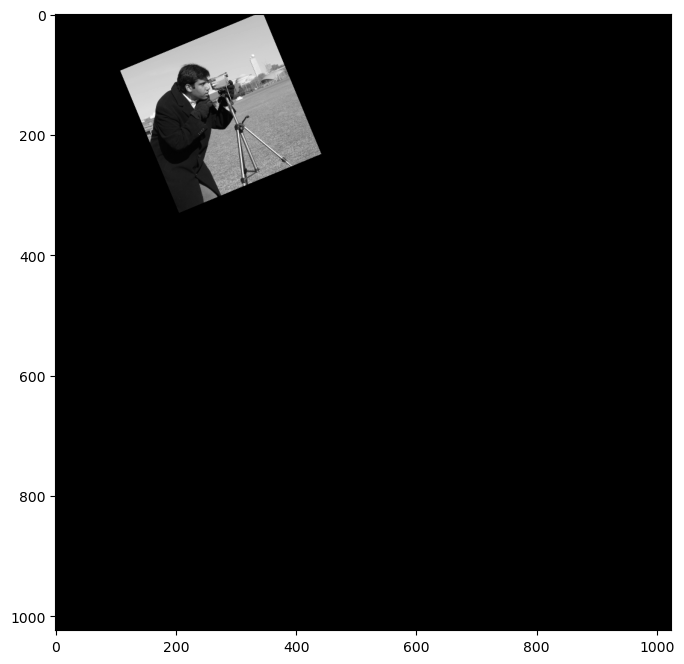

In [71]:
## Put your code below

rotation=math.pi/8
translation = [128, 0]
scale = 0.5

transform_mat = \
    np.array([
        [math.cos(rotation)/scale, -math.sin(rotation)/scale, translation[0]],
        [math.sin(rotation)/scale, math.cos(rotation)/scale, translation[1]],
        [0, 0, 1]
    ])

print(transform_mat)

plot_grayscale(skimage.transform.warp(camera_image_background, transform_mat))

> 4. You can check your transformation matrix by using the [skimage.transform.SimilarityTransform](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.SimilarityTransform) function, using the rotation angle, translation vector and scale (using the inverse). Compute and display the transformation matrix, in homogeneous coordinates, using the arguments specified in step 1 of this exercise.

In [70]:
## Put your code below
skimage.transform.SimilarityTransform(rotation=rotation, translation=translation, scale=1/scale)

<SimilarityTransform(matrix=
    [[  1.84775907,  -0.76536686, 128.        ],
     [  0.76536686,   1.84775907,   0.        ],
     [  0.        ,   0.        ,   1.        ]]) at 0x1cad2292ca0>

> In one or two sentences answer the following questions. 
> 1. Compare the image size and shape against the original image size. Does the transform appear to be correctly applied and why?   
> 2. Is the homogeneous transformation matrix you computed identical to the one computed with the `SimilarityTransform` function? 
> **End of exercise.**

> **Answer:** 
> 1.  This looks more-or-less accurate. The original image is aproximately 500 pixels high and this scaled image looks approximately 250 pixels high.  Its hard to judge exactly, but the fact that it looks close means it is probably working as excpected.
> 2.  Yes, they are identical.   

## Affine Transform

Continuing to generalize the transformation you will now add a shear factor to the transformation. An affine transformation can perform rotation, translation, scaling and shear. The affine transformation preserves parallel lines.   

> **Exercise 9-3:**  You will now do the following to explore the properties of the affine transform following the convention used in the [skimage.transform.AffineTransform](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.AffineTransform) function: 
> 1. Create a Numpy transformation matrix in homogeneous coordinate with:   
>   - Rotation of $\pi/8$. Keep in mind that the scale is applied as $1.0/scale$ to each of the rotation matrix elements.  
>   - Translation vector of $[256,-256]^T$. The first element of the inverse scale is applied to the x-axis rotations and the second element to the y-axis rotations.   
>   - Scale vector of $[0.8, 0.4]$.   
>   - Shear angle of $\pi/6$. Shear is added to the y-axis rotation angle.   
> 2. Display the transformation matrix.   
> 3. Apply your transformation matrix to the image and display the result.  

[[   0.92387953   -0.79335334  320.        ]
 [   0.38268343    0.60876143 -320.        ]
 [   0.            0.            1.        ]]


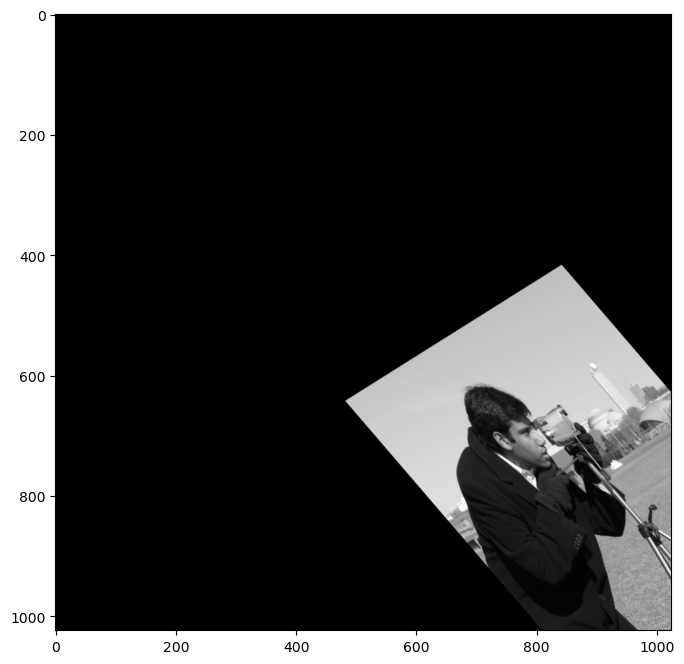

In [93]:
## Put your code below
rotation = math.pi/8
translation=[256,-128]
scale=[0.8, 0.4]
shear = math.pi/6

transform_mat = \
    np.array([
        [math.cos(rotation), -math.sin(rotation+shear), translation[0]/scale[0]],
        [math.sin(rotation),  math.cos(rotation+shear), translation[1]/scale[1]],
        [0,0,1]
    ])

print(transform_mat)

plot_grayscale(skimage.transform.warp(camera_image_background, transform_mat))

> 4. You can check your transformation matrix by using the [skimage.transform.AffineTransform](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.AffineTransform) function, using the rotation angle, translation vector and scale (not the inverse). Compute and display the transformation matrix, in homogeneous coordinates, using the arguments specified in step 1 of this exercise.

In [90]:
## Put your code below

skimage.transform.AffineTransform(rotation=rotation, translation=translation, scale=scale, shear=shear)

<AffineTransform(matrix=
    [[ 7.39103626e-01, -3.17341336e-01,  2.56000000e+02],
     [ 3.06146746e-01,  2.43504572e-01, -2.56000000e+02],
     [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]) at 0x1cad0b321c0>

> In one or two sentences answer the following questions. 
> 1. Compare the image size and shape against the original image size. Does the transform appear to be correctly applied and why?   
> 2. Is the homogeneous transformation matrix you computed identical to the one computed with the `AffineTransform` function? 
> **End of exercise.**

> **Answer:** 
> 1.   It looks correct, yes. THe scaling has clearly made the image higher than it is wide and it has done the traditional rotation and translation.  The shearing is difficult to judge on its accuracy, but you can very clearly see that the corners are no longer 90 degrees.   
> 2.   Now it looks different, but I'm not sure why. I have applied the rules the way it looks like they should be.  It could be because we are no longer putting in the inverse of the scaling. 

## Working with the Intrinsic Matrix

Up until now, you have been working only with the **extrinsic transformation matrix**, which defines the projection of an object on the image plane. The extrinsic properties of are also known as **camera pose**. These transformations do not account for inernal camera parameters.   

The **intrinsic matrix** is used to model camera specific characteristics. Here we will only deal with one camera parameter, the focal length. Focal length is typically denoted $[\phi_x, \phi_y]$, for the x and y components, which can be independent. The differences in x and y can arrise for a number of reasons, such as asymmetry of the camera sensor. In Cartesian coordinates, for a basic pinhole camera the object location, $[x,y,w]$, maps to the $[x,y]$ location on the image plane by the following relationships:   

$$[x,y] = \Bigg[\frac{\phi_x\ u}{w},\frac{\phi_y\ v}{w} \Bigg]$$


> **Exercise 9-4:** You will now apply an intrinsic matrix for two different camera focal lengths by the following steps:  
> 1. Define a Numpy extrinsic transform matrix in homogeneous coordinates with rotation $= 0$, translation $[-512,-512]$, no rotation, no scaling, and no shear.  
> 2. Define an intrinsic matrix in homogeneous coordinates with focal length $[\omega_x, \omega_y]=[2.0, 2.0]$, array offset of 0, and skew correction of 0.  
> 3. Perform matrix multiplication between the transform matrix by the intrinsic matrix using [numpy.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html).
> 4. Print the resulting product of the transformation matrix. 
> 5. Apply the resulting transformation product to the image and display the result. 

[[   2.    0. -512.]
 [   0.    2. -512.]
 [   0.    0.    1.]]


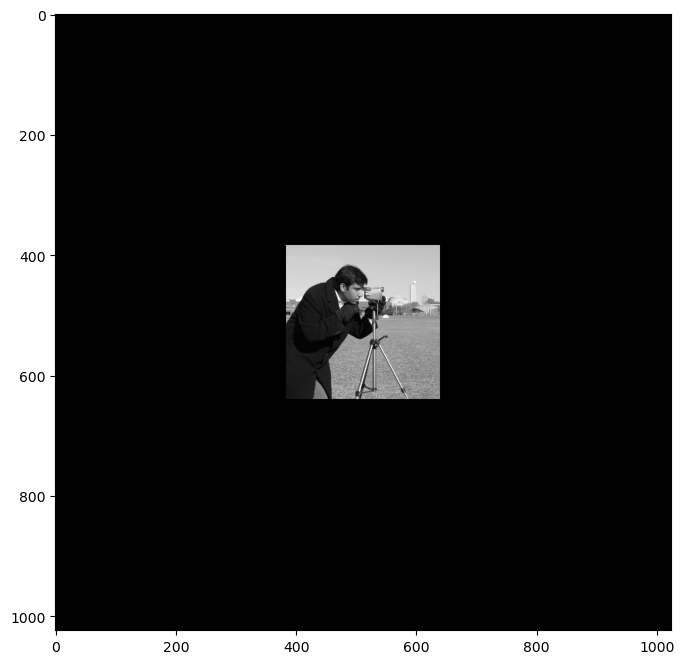

In [107]:
## Put your code below

rotation=0
translation=[-512, -512]

translat_mat = \
    np.array([
        [math.cos(rotation), -math.sin(rotation), translation[0]],
        [math.sin(rotation),  math.cos(rotation), translation[1]],
        [0, 0, 1]
    ])

focal_len = [2.0, 2.0]
offsets = [0, 0]
skew_correction = 0

intrins_mat = \
    np.array([
        [focal_len[0], skew_correction, offsets[0]],
        [0,            focal_len[1],    offsets[1]],
        [0,            0,               1]
    ])


total_correction_mat = np.dot(translat_mat, intrins_mat)
print(total_correction_mat)
plot_grayscale(skimage.transform.warp(camera_image_background, total_correction_mat))

> 6. Define a Numpy extrinsic transform matrix in homogeneous coordinates with rotation $= 0$, translation $[256,256]$, no roation, no scaling, and no shear.  
> 7. Define an intrinsic matrix in homogeneous coordinates with focal length $[\omega_x, \omega_y]=[0.5, 0.5]$, array offset of 0, and skew correction of 0.  
> 8. Perform matrix multiplication between the transform matrix by the intrinsic matrix using [numpy.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html). 
> 9. Print the resulting product of the transformation matrix. 
> 10. Apply the resulting transformation product to the image and display the result. 

[[  0.5   0.  256. ]
 [  0.    0.5 256. ]
 [  0.    0.    1. ]]


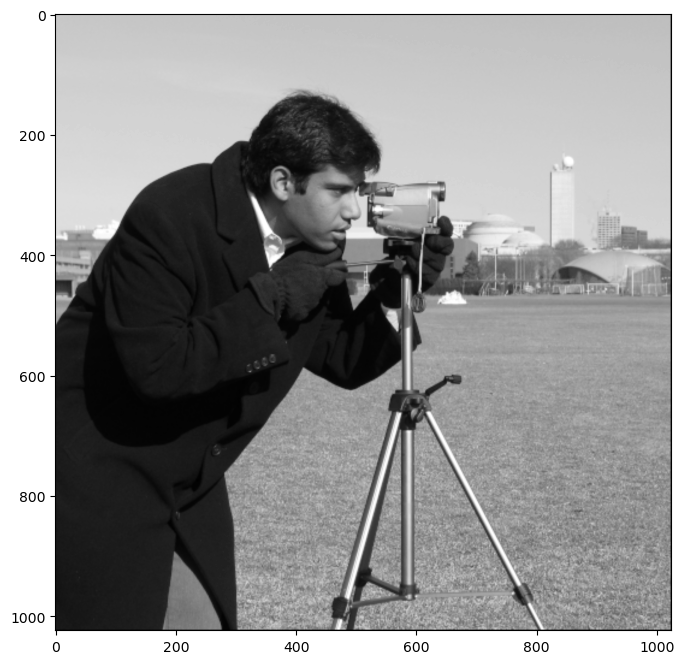

In [104]:
## Put your code below

rotation=0
translation=[256, 256]

translat_mat = \
    np.array([
        [math.cos(rotation), -math.sin(rotation), translation[0]],
        [math.sin(rotation),  math.cos(rotation), translation[1]],
        [0, 0, 1]
    ])

focal_len = [0.5, 0.5]
offsets = [0, 0]
skew_correction = 0

intrins_mat = \
    np.array([
        [focal_len[0], skew_correction, offsets[0]],
        [0,            focal_len[1],    offsets[1]],
        [0,            0,               1]
    ])


total_correction_mat = np.dot(translat_mat, intrins_mat)
print(total_correction_mat)
plot_grayscale(skimage.transform.warp(camera_image_background, total_correction_mat))


> In one or two sentences answer the following questions.  
> 1. Examine the upper left 4 elements of the first complete transformation matrix for focal length of 2.0. What does the diagonal and off diagonal elements of these terms tell you about the properties of the resulting transformed image?  
> 2. Examine the first transformed image. Does this image appear as it should and why? 
> 3. Examine the upper left 4 elements of the second complete transformation matrix for focal length of 0.5. What does the diagonal and off diagonal elements of these terms tell you about the properties of the resulting transformed image? 
> 4. Examine the second transformed image. When compared to the image with focal length of 2.0 is the transformed image with focal length of 0.5 consistent with the change in focal length? 
> **End of exercise**. 

> **Answers:**  
> 1.      The diagonal elements here are saying to scale by a factor of 1/2 and the off diagonal elements are showing that there is zero ratation. It is not a perfect representation, because scale and rotation are co-determined but in the case where the rotation is zero it is clearly defined this way.
> 2.      It does.  It has reduced the entier image in half (1/2 = 0.5). 
> 3.      The diagonal elements here are saying to scale 1/0.5 and the off diagonal elements are showing that there is zero ratation. It is not a perfect representation, because scale and rotation are co-determined but in the case where the rotation is zero it is clearly defined this way.
> 4.      It does. It has doubled the size of the image (1/0.5 = 2)

## Projective transform

Projective transforms are the most general planar transformations. Here we will only deal with some simple examples, which are equivalent to changing the camera position. 

In homogenous coordinates, we define the projective transformation matrix as the product of the intrinsic matrix and the extrinsic matrix:  

$$
\Omega \Lambda = 
\begin{bmatrix}
   \phi_{11}  & \phi_{12} & \phi_{13} \\
    \phi_{21}  & \phi_{22} & \phi_{23} \\
    \phi_{31}  & \phi_{32} & \phi_{33}
\end{bmatrix}
= \begin{bmatrix}
   \phi_1  & \gamma & \delta_x \\
   0  & \phi_2 & \delta_y \\
    0  & 0 & D
\end{bmatrix}
\begin{bmatrix}
   \omega_{11}  & \omega_{12} & \tau_x \\
    \omega_{21}  & \omega_{22} & \tau_y \\
    \omega_{31}  & \omega_{32} & \tau_z
\end{bmatrix}
$$

For the following exercise you will work with a picture of a piece of furniture in the interior of a house. To load and prepare this image execute the code in the cell below.  

Iinital image shape = (3024, 4032, 3)
Final image shape = (300, 400)


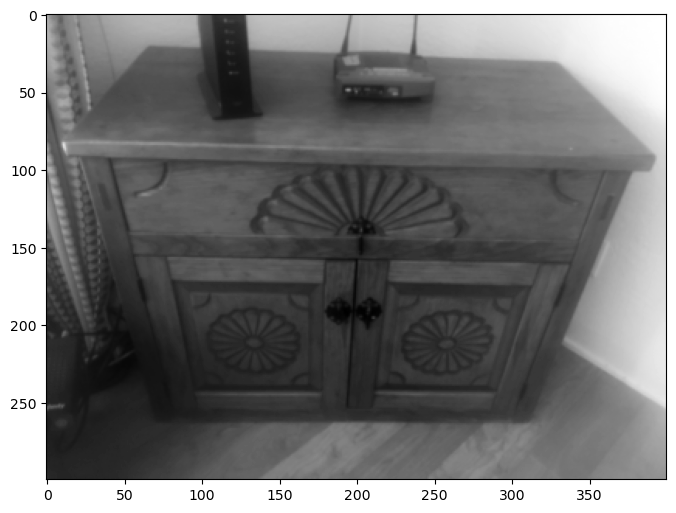

In [108]:
chest = Image.open('../datafiles/chest.JPG')
chest = np.array(chest)
print('Iinital image shape = ' + str(chest.shape))

chest = rgb2gray(chest)
chest = transform.resize(chest, (300,400))
print('Final image shape = ' + str(chest.shape))

plot_grayscale(chest)

For the following exercises, you will compute a full projective transform matix as the product of an intrinsic matrix and an extrinsic matrix. You will then apply the projective transform to the image shown above.   

> **Exercise 9-5:** As a first step to get a feel for projective transformations, do the following. 
> 1. Create an intrinsic camera matrix as a Numpy array with 1.0 on the diagonal and 0.0 everywhere else, or a $3 \times 3$ identify matrix.  
> 2. Create an extrinsic Numpy transformation matrix with the following properties:   
>   - $[\tau_x, \tau_y, tau_z] = [-32,0,1.0]$
>   - The lower left element $=-0.001$, which roughly speaking moves the camera pose horizontally   
>   - No rotation or shear    
> 3. Compute and print the fully projective transformation matrix. 
> 4. Apply the transformation matrix to the chest image and display the result. 

[[ 1.0e+00  0.0e+00 -3.2e+01]
 [ 0.0e+00  1.0e+00  0.0e+00]
 [-1.0e-03  0.0e+00  1.0e+00]]


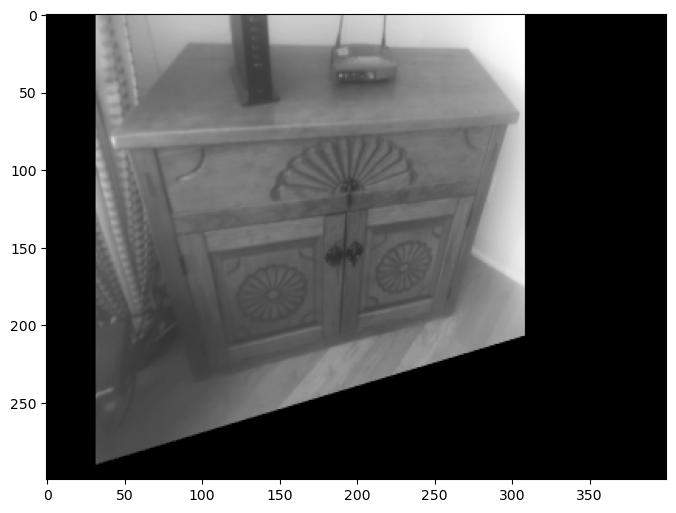

In [112]:
## Put your code below

intrinsic_mat = \
    np.array([
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]
    ])

scale=1
rotation=0
translat_mat = \
    np.array([
        [math.cos(rotation), -math.sin(rotation), -32/scale], 
        [math.sin(rotation),  math.cos(rotation), 0/scale],
        [-0.001, 0, 1]
    ])

full_projection = np.dot(translat_mat, intrinsic_mat)
print(full_projection)
plot_grayscale(skimage.transform.warp(chest, full_projection))


> Answer the following quesitons:   
> 1. In one or two sentences, how can you qualitatively describe the change in the apparent camera pose with respect to the original image resulting from this transformation?  
> 2. Examine the projective transformation marix. Given the simple diagonal structure of the intrinsic camera matrix, is this result expected and why?    

> **Answers:**     
> 1.      The camera appears to have moved slightly to the left but has kept the lens pointed at the center of the chest.  Thus, we have a warped image.
> 2.     I would not have expected the warping, since I would have thought that the image woudld have simply "chopped" of the right-most pixels because we did not input a shearing function.

> **Exercise 9-6:** To continue your exploration of the projective transform, do the following. 
> 1. Create an intrinsic camera matrix as a Numpy array with 1.0 on the diagonal and 0.0 everywhere else.  
> 2. Create an extrinsic Numpy transformation matrix with the following properties:    
>   - $[\tau_x, \tau_y, tau_z] = [-64,0,0.6]$
>   - The lower left element $=-0.001$, which roughly speaking moves the camera pose horizontally  
>   - The lower middle element $= 0.002$, which roughtly speaking moves the camera pose vertically   
>   - No rotation or shear     
> 3. Compute and print the fully projective transformation matrix. 
> 4. Apply the transformation matrix to the chest image and display the result. 

[[ 1.00000000e+00  0.00000000e+00 -1.06666667e+02]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-1.00000000e-03  2.00000000e-03  1.00000000e+00]]


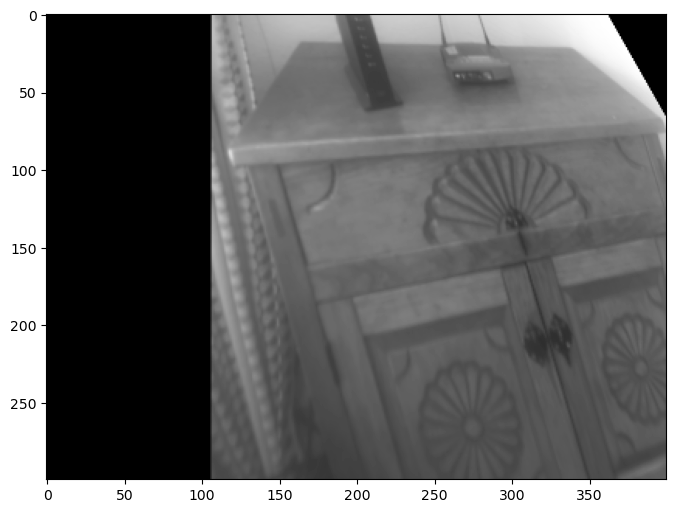

In [113]:
## Put your code below
  
intrinsic_mat = \
    np.array([
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]
    ])

scale=0.6
rotation=0

translat_mat = \
    np.array([
        [math.cos(rotation), -math.sin(rotation), -64/scale], 
        [math.sin(rotation),  math.cos(rotation), 0/scale],
        [-0.001, 0.002, 1]
    ])

full_projection = np.dot(translat_mat, intrinsic_mat)
print(full_projection)
plot_grayscale(skimage.transform.warp(chest, full_projection))    
    
    
    

> In one or two sentences, how can you qualitatively describe the change in the apparent camera pose with respect to the original image resulting from this transformation? 

> **Answer:**     
This has added additional warping. We still see the warping from having moved the camera to the left and now we have added the warping from moving the camera "down" so-to-speak.  We hav also changed teh scaling factor, so we see a more zoomed-in view of the chest.

> **Exercise 9-7:** To continue your exploration of the projective transform, do the following. 
> 1. Create an intrinsic camera matrix as a Numpy array with 1.0 on the diagonal and 0.0 everywhere else, except an image plane skew, as $\gamma = -0.3$.  
> 2. Create an extrinsic Numpy transformation matrix with the following properties:             
>   - $[\tau_x, \tau_y, \tau_z] = [-128, 16, 0.5]$
>    - The lower left element $=-0.001$, which roughly speaking moves the camera pose horizontally  
>    - The lower middle element $= 0.002$, which roughtly speaking moves the camera pose vertically   
>    - Rotation angle of $-\pi/20.0$    
>    - Camera pose shear $=-0.3$
> 3. Compute and print the fully projective transformation matrix. 
> 4. Apply the transformation matrix to the chest image and display the result. 

[[ 9.87688341e-01  1.42434310e-01 -2.13333333e+02]
 [ 1.56434465e-01  9.89804257e-01  2.66666667e+01]
 [-1.00000000e-03  2.00000000e-03  1.00000000e+00]]


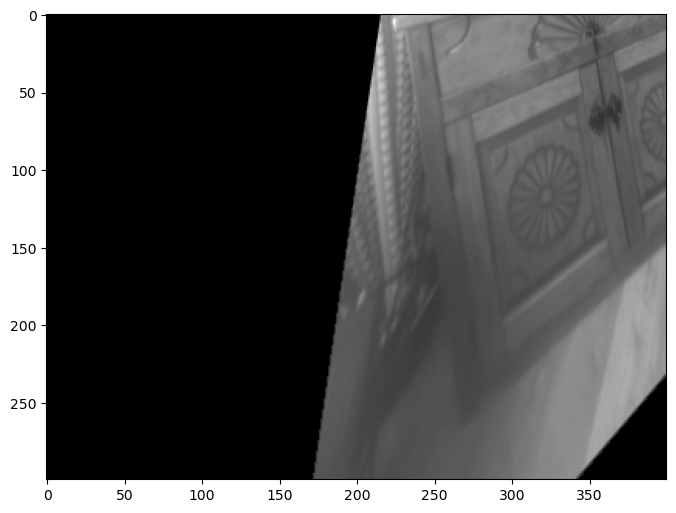

In [115]:
## Put your code below


scale=0.6
rotation=math.pi/20
shear = -0.3

translat_mat = \
    np.array([
        [math.cos(rotation), -math.sin(rotation+shear), -128/scale], 
        [math.sin(rotation),  math.cos(rotation+shear), 16/scale],
        [-0.001, 0.002, 1]
    ])

full_projection = np.dot(translat_mat, intrinsic_mat)
print(full_projection)
plot_grayscale(skimage.transform.warp(chest, full_projection))    



> Answer the following quesitons:   
> 1. In one or two sentences, how can you qualitatively describe the change in the apparent camera pose with respect pose in the pervious exercise?  
> 2. Examine the projective transformation marix. How does this matrix differ from the one you examined for Exercise 9.5 and what does this tell you about the non-linearity of the response to parameters of the extrinsic matrix?    

> **Answers:**     
> 1.     We have now SERIOUSLY warped the image. We have warped teh extreme edges of the image, but because of the off-setting shearing the center of the chest looks more like it didn in the original, albeit much more off center.
> 2.     I mentioned this in a previous answer, but these terms are VERY clearly non-linear. This is most obvious because of the trig functions, which never behave linearly, but these are co-determined subject to constraints (that we can change) and therefore they are non-linear.

####  Copyright 2022, 2023, Stephen F Elston. All rights reserved. 